# Detecting the edges of an image using OpenCV 


Edge Detection is when we use matrix math to calculate areas of different intensities of an image. Areas where there are extreme differences in the intensities of the pixel usually indicate an edge of an object. After finding all of the large differences in intensities in a picture, we have discovered all of the edges in the picture.


What is an edge:
-  A location in the image where is a sudden change (a jump) in the intensity/colour of pixels.
-  A transition between objects or object and background.


- **Gradient**
    - Gradient Estimation of the intensity gradient at a pixel in the x and y direction.
    - The gradient is a vector-valued function. A vector that points across the edge from darker to brighter values (direction of the greatest rate of increase of the function).
    - The gradient represents the slope of the tangent of the graph of the function. 

---

## 1) Sobel edge detection method


Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise.
When using Sobel Edge Detection, the image is processed in the X and Y directions separately first, and then combined together to form a new image which represents the sum of the X and Y edges of the image. 


**Step-By-Step:**

- 1) Convert the image from ***RGB/BGR/HSV*** to ***grayscale**.

- 2) Use two **convolution kernels** (*3x3 matrix*) one for X direction, and the other (for Y direction) is simply the frist one rotated by 90°.

- 3) Slide the kernel across the X direction (i.e from left to right) to create the horizontal Sobel derivative (**Sobel x**).

- 4) Slide the kernel across the Y direction (i.e from top to bottom) to create the vertical Sobel derivative (**Sobel y**).

- 5) Add together to **Sobel x** and **Sobel y** to to get the **Laplacian (approximation)** (i.e create an accurate representation of all of the edges (X and Y Direction) in the image).

<img src="https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/sobmasks.gif" width="300">

<img src="https://miro.medium.com/max/945/1*QWc_Vhpx5FYpJZ_Ycn1oUA.png" width="400">

Images source: [http://www.doc.ic.ac.uk/~ts2615/contribution.html](http://www.doc.ic.ac.uk/~ts2615/contribution.html)
[https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm](https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm)


> Note:  Increase in the coefficients of the middle row or column in the 3-by-3 convolution kernels increases the number of detected edges. For example, instead of -2 and 2 perhaps use -5 and 5. This would make the gradient of the edge larger and therefore, more noticeable.

> The derivative of a matrix is calculated by an operator called the Laplacian


---

**Methods in OpenCV**

1) **Sobel** :

**Syntax:** `cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])`


**Parameters:**

- **src** -> input image.
- **dst** -> output image of the same size and the same number of channels as src .
- **ddepth** -> output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives.
- **dx** -> order of the derivative x.
- **dy** -> order of the derivative y.
- **ksize** -> size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
- **scale** -> optional scale factor for the computed derivative values; by default, no scaling is applied (see getDerivKernels for details).
- **delta** -> optional delta value that is added to the results prior to storing them in dst.
- **borderType** -> representing the type of the border that is to be used for padding. 




--- 
1) **Laplacian** :

Syntax: `cv2.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]])
`


--- 

> Note: 
> - If you want to detect both edges without missing one of them, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U.
> - when ddepth=-1, the output image will have the same depth as the source.


- **Additional resources**
    
    - [https://www.cs.auckland.ac.nz/compsci373s1c/PatricesLectures/Edge%20detection-Sobel_2up.pdf](https://www.cs.auckland.ac.nz/compsci373s1c/PatricesLectures/Edge%20detection-Sobel_2up.pdf)
    - [https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html)
    - [https://medium.com/datadriveninvestor/understanding-edge-detection-sobel-operator-2aada303b900](https://medium.com/datadriveninvestor/understanding-edge-detection-sobel-operator-2aada303b900)
    - [https://www.projectrhea.org/rhea/index.php/An_Implementation_of_Sobel_Edge_Detection](https://www.projectrhea.org/rhea/index.php/An_Implementation_of_Sobel_Edge_Detection)
    - [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#making-borders-for-images-padding](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#making-borders-for-images-padding)
    - [https://answers.opencv.org/question/7037/sobel-function-argument/?answer=7047#post-id-7047](https://answers.opencv.org/question/7037/sobel-function-argument/?answer=7047#post-id-7047)

In [ ]:
# Python program to Edge detection using OpenCV in Python using Sobel edge detection and laplacian method 
import cv2 
import numpy as np 

#Capture livestream video content from camera 0 
cap = cv2.VideoCapture(0) 

while(1): 

    # Take each frame 
    _, frame = cap.read() 
    
    # Convert to HSV for simpler calculations 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
    
    # Calcution of Sobelx 
    sobelx = cv2.Sobel(frame, cv2.CV_64F, 1, 0, ksize=5) 
    
    # Calculation of Sobely 
    sobely = cv2.Sobel(frame, cv2.CV_64F, 0, 1, ksize=5) 
    
    # Calculation of Laplacian 
    laplacian = cv2.Laplacian(frame, cv2.CV_64F) 
    
    cv2.imshow('sobelx', sobelx) 
    cv2.imshow('sobely', sobely) 
    cv2.imshow('laplacian', laplacian) 
    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break

cv2.destroyAllWindows() 

#release the frame 
cap.release() 


## 2) Canny edge detection method


**The Canny edge detection algorithm is composed of 5 steps:***

- **1-** **Noise reduction**

First step is to remove the noise in the image with a **Gaussian blur filter**. The kernel size depends on the expected blurring effect. Basically, the smallest the kernel, the less visible is the blur. In our example, we will use a 5 by 5 Gaussian kernel.


- **2- Gradient calculation**

Apply filters that highlight this intensity change in both directions: horizontal (x) and vertical (y), usually **Sabel filters**, Then, the magnitude **G** and the slope **θ** of the gradient are calculated.

- **3- Non-maximum suppression**

The edges on the final result should have the same intensity (i-e. white pixel = 255). Ideally, the final image should have thin edges. Thus, we must perform non-maximum suppression to thin out the edges.
The algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions. In short,  if the pixel forms a local maximum it is considered for next stage, otherwise, it is suppressed ( put to zero).


- **4- Double threshold:** double threshold step aims at identifying 3 kinds of pixels:

    - High threshold is used to identify the **strong** pixels (intensity higher than the high threshold)
    - Low threshold is used to identify the **non-relevant** pixels (intensity lower than the low threshold)
    - All pixels having intensity **between both thresholds** are flagged as **weak**  


- **5- Edge Tracking by Hysteresis**


the Hysteresis mechanism will help us identify the pixels that could be considered as strong and the ones that are considered as non-relevant. Based on the threshold results, the hysteresis consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one.

<img src="https://miro.medium.com/max/1013/1*jnqS5hbRwAmU-sgK552Mgg.png" width="400">

---

**Canny in OpenCV:**

*Syntax:* `cv.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])`

*Parameter:*


- **image** -> 8-bit input image.
- **edges**	-> output edge map; single channels 8-bit image, which has the same size as image .
- **threshold1** ->	first threshold for the hysteresis procedure (minVal).
- **threshold2** ->	second threshold for the hysteresis procedure (maxVal).
- **apertureSize** -> the size of Sobel kernel used for find image gradients. (DEFUALT =3)
- **L2gradient** -> Boolean value specifies the equation for finding gradient magnitude. If it's True, it uses this equation `Edge_Gradient(G) = √G2x+G2y` which is more accurate, otherwise it uses this function `Edge_Gradient(G)=|Gx|+|Gy|`

---

**Sdditional resources:**
- [https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123)
- [https://docs.opencv.org/master/da/d22/tutorial_py_canny.html](https://docs.opencv.org/master/da/d22/tutorial_py_canny.html)

In [ ]:
# Edge detection in real time 
import cv2 
import numpy as np 

# capture frames from a camera 
cap = cv2.VideoCapture(0) 

# loop runs if capturing has been initialized 
while(1): 

    # reads frames from a camera 
    ret, frame = cap.read() 
    
    """
    # converting BGR to HSV 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
    
    # define range of red color in HSV 
    lower_red = np.array([30,150,50]) 
    upper_red = np.array([255,255,180]) 
    
    # create a red HSV colour boundary and threshold HSV image 
    mask = cv2.inRange(hsv, lower_red, upper_red) 

    # Bitwise-AND mask and original image 
    res = cv2.bitwise_and(frame,frame, mask= mask) 
    """
    
    # Display an original image 
    cv2.imshow('Original',frame) 

    # finds edges in the input image and marks them in the output map edges 
    edges = cv2.Canny(frame, 100, 200) 

    # Display edges in a frame 
    cv2.imshow('Edges',edges) 

    # Wait for Esc key to stop 
    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break


# Close the window 
cap.release() 

# De-allocate any associated memory usage 
cv2.destroyAllWindows() 


## 3) Houghline method

The Hough Transform is a method that is used in image processing to detect any shape can be represented in mathematical form even if it is broken or distorted a little bit.

We will see how Hough transform works for line detection using the HoughLine transform method. To apply the Houghline method, first an edge detection of the specific image is desirable.


<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0031320304000561-gr3.gif">


- A line can be represented in parametric form, as `r = xcosθ + ysinθ` where **r** is the perpendicular distance from origin to the line, and **θ** is the angle formed by this perpendicular line and horizontal axis measured in counter-clockwise.

- Every line in the (xy) space is represented as a point in the **hough** (rθ) space.

- Every point on a line in the (xy) space is represented as a line in the **hough** (rθ) space.

- For example, if we have 2 point on a line in the (xy) space, they could be represented as 2 lines in the **hough** (rθ) space.


**Step-by-step:**

- 1) Edge detection is done.

- 1) mapping the edge points to the Hough space and store them in a 2D accumulator array (to hold values of two parameters) and it is set to zero initially.

- 2) Let *rows* denote the *r* and *columns* denote the *(θ)theta*.

- 3) Size of array depends on the accuracy you need. Suppose you want the accuracy of angles to be 1 degree, you need 180 columns(Maximum degree for a straight line is 180).

- 4) For r, the maximum distance possible is the diagonal length of the image. So taking one pixel accuracy, number of rows can be diagonal length of the image.


**Example:**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/line-detection-2.png" width="600">



---


**Sytanx:** `cv.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]])`

     The function implements the standard or standard multi-scale Hough transform algorithm for line detection
     It simply returns an array of (r, θ) values. 

- **image:**  8-bit, single-channel binary source image. The image may be modified by the function.
- **lines:**  Output vector of lines.  Each line is represented by a 2 or 3 element vector (ρ,θ) or (ρ,θ,votes) . 
- **rho:**   Distance resolution of the accumulator in pixels.
- **theta:** Angle resolution of the accumulator in radians.
- **threshold:** Accumulator threshold parameter. Only those lines are returned that get enough votes ( >threshold ).
- **srn:**  For the multi-scale Hough transform, it is a divisor for the distance resolution rho . The coarse accumulator distance resolution is rho and the accurate accumulator resolution is rho/srn . If both srn=0 and stn=0 , the classical Hough transform is used. Otherwise, both these parameters should be positive.

- **stn:**  For the multi-scale Hough transform, it is a divisor for the distance resolution theta.
- **min_theta:**  For standard and multi-scale Hough transform, minimum angle to check for lines. Must fall between 0 and max_theta.
- **max_theta:**  For standard and multi-scale Hough transform, maximum angle to check for lines. Must fall between min_theta and CV_PI.


> Remember, number of votes depend upon number of points on the line. So it represents the minimum length of line that should be detected.

----

- **Additional resources:** 
     - [https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/?ref=lbp](https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/?ref=lbp)

     - [https://www.youtube.com/watch?v=gbL3XKOiBvw](https://www.youtube.com/watch?v=gbL3XKOiBvw)

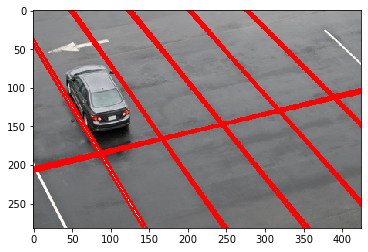

In [4]:
# Python program to illustrate HoughLinemethod for line detection 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  

img = cv2.imread('image.jpg') 
# 1) Convert the img to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

# 2) Apply edge detection method on the image 
edges = cv2.Canny(gray, 50, 100, apertureSize = 3) 

# 3) This returns an array of (r, theta) values
# how to know the right thershold value ?
lines = cv2.HoughLines(edges, 1, np.pi/180, 120) 

# 4) The below for loop runs till r and theta values are in the range of the 2d array 
for line in lines: 
    r, theta = line[0]
    a = np.cos(theta) 
    b = np.sin(theta) 
    
    # x0 stores the value rcos(theta) 
    x0 = a*r 
    
    # y0 stores the value rsin(theta) 
    y0 = b*r 
    
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
    
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
    
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
    
    # 5) cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be drawn. In this case, it is red. 
    cv2.line(img,(x1,y1), (x2,y2), (0,0,255), 2) 
    
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', img) 

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))